# Import Dependencies

In [177]:
#Import pandas
import pandas as pd
#Import numpy
import numpy as np
#Import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
#Import math library
import math

# Data Preparation

In [14]:
# Reading the two datasets
df_closing = pd.read_csv('10 ETFs Daily Closing Prices.csv')
df_rtns = pd.read_csv('10 ETFs Daily Rtns.csv')

df_closing.head()

,Date,SPY,EFA,EEM,TLT,SHY,FXE,FXY,DBE,DBA,DBB
0,1/4/2007,141.669998,73.300003,37.849998,89.599998,80.120003,130.929993,NaN,NaN,NaN,NaN
1,1/5/2007,140.539993,72.199997,36.743332,89.209999,80.070000,130.089996,NaN,24.190001,25.02,23.709999
2,1/8/2007,141.190002,72.300003,37.009998,89.370003,80.019997,130.270004,NaN,24.340000,24.98,23.389999
3,1/9/2007,141.070007,72.370003,36.183334,89.370003,80.050003,130.059998,NaN,24.480000,24.66,23.270000
4,1/10/2007,141.539993,71.820000,36.099998,88.970001,80.029999,129.570007,NaN,23.790001,24.73,24.219999


In [29]:
df_closing[['Date','SPY']]

,Date,SPY
0,1/4/2007,141.669998
1,1/5/2007,140.539993
2,1/8/2007,141.190002
3,1/9/2007,141.070007
4,1/10/2007,141.539993
...,...,...
3868,5/16/2022,400.089996
3869,5/17/2022,408.320007
3870,5/18/2022,391.859985
3871,5/19/2022,389.459991


In [45]:
# Merging of the two datasets using concat
df = pd.concat([df_closing, df_rtns], ignore_index=True)

df.head()

,Date,SPY,EFA,EEM,TLT,SHY,FXE,FXY,DBE,DBA,DBB
0,1/4/2007,141.669998,73.300003,37.849998,89.599998,80.120003,130.929993,NaN,NaN,NaN,NaN
1,1/5/2007,140.539993,72.199997,36.743332,89.209999,80.070000,130.089996,NaN,24.190001,25.02,23.709999
2,1/8/2007,141.190002,72.300003,37.009998,89.370003,80.019997,130.270004,NaN,24.340000,24.98,23.389999
3,1/9/2007,141.070007,72.370003,36.183334,89.370003,80.050003,130.059998,NaN,24.480000,24.66,23.270000
4,1/10/2007,141.539993,71.820000,36.099998,88.970001,80.029999,129.570007,NaN,23.790001,24.73,24.219999


In [ ]:
df = pd.concat([df_closing, df_rtns],axis=1, ignore_index=True)

df.head()

In [162]:
# Columns renaming
df.rename(columns = {0:'Date', 1:'SPY_cls', 2:'EFA_cls', 3:'EEM_cls', 4:'TLT_cls', 5:'SHY_cls', 6:'FXE_cls', 7:'FXY_cls', 8:'DBE_cls', 9:'DBA_cls', 10:'DBB_cls', 11:'Date_rtns', 12:'SPY_rtns', 13:'EFA_rtns', 14:'EEM_rtns', 15:'TLT_rtns', 16:'SHY_rtns', 17:'FXE_rtns', 18:'FXY_rtns', 19:'DBE_rtns', 20:'DBA_rtns', 21:'DBB_rtns'}, inplace = True)

In [76]:
df.drop(['Date_rtns'], axis = 1, inplace=True)

In [78]:
df.head()

,Date,SPY,EFA_cls,EEM_cls,TLT_cls,SHY_cls,FXE_cls,FXY_cls,DBE_cls,DBA_cls,...,SPY_rtns,EFA_rtns,EEM_rtns,TLT_rtns,SHY_rtns,FXE_rtns,FXY_rtns,DBE_rtns,DBA_rtns,DBB_rtns
0,1/4/2007,141.669998,73.300003,37.849998,89.599998,80.120003,130.929993,NaN,NaN,NaN,...,0.002122,-0.002857,-0.013809,0.006063,0.001000,-0.005998,NaN,NaN,NaN,NaN
1,1/5/2007,140.539993,72.199997,36.743332,89.209999,80.070000,130.089996,NaN,24.190001,25.02,...,-0.007976,-0.015007,-0.029238,-0.004353,-0.000624,-0.006416,NaN,NaN,NaN,NaN
2,1/8/2007,141.190002,72.300003,37.009998,89.370003,80.019997,130.270004,NaN,24.340000,24.98,...,0.004625,0.001385,0.007258,0.001794,-0.000624,0.001384,NaN,0.006201,-0.001599,-0.013496
3,1/9/2007,141.070007,72.370003,36.183334,89.370003,80.050003,130.059998,NaN,24.480000,24.66,...,-0.000850,0.000968,-0.022336,0.000000,0.000375,-0.001612,NaN,0.005752,-0.012810,-0.005130
4,1/10/2007,141.539993,71.820000,36.099998,88.970001,80.029999,129.570007,NaN,23.790001,24.73,...,0.003332,-0.007600,-0.002303,-0.004476,-0.000250,-0.003767,NaN,-0.028186,0.002839,0.040825


In [146]:
# Selecting a list of columns for specific ETF
SPY = df[['Date','SPY','SPY_rtns']]
day = np.arange(1, len(SPY) + 1)
SPY['Day'] = day

/tmp/ipykernel_7923/3925893498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY['Day'] = day


In [147]:
SPY

,Date,SPY,SPY_rtns,Day
0,1/4/2007,141.669998,0.002122,1
1,1/5/2007,140.539993,-0.007976,2
2,1/8/2007,141.190002,0.004625,3
3,1/9/2007,141.070007,-0.000850,4
4,1/10/2007,141.539993,0.003332,5
...,...,...,...,...
3868,5/16/2022,400.089996,-0.004058,3869
3869,5/17/2022,408.320007,0.020570,3870
3870,5/18/2022,391.859985,-0.040312,3871
3871,5/19/2022,389.459991,-0.006125,3872


# ETF Plot

In [148]:
y = SPY['SPY']
x = SPY['Day']

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


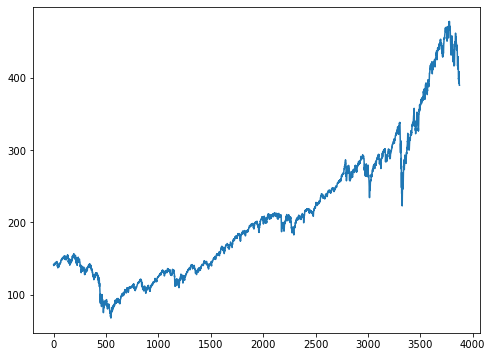

In [149]:

plt.plot(x,y)


# Add moving averages to the data frame

In [150]:
# 9-day and 21-day Moving average
SPY['9-day'] = SPY['SPY'].rolling(9).mean()
SPY['21-day'] = SPY['SPY'].rolling(21).mean()


/tmp/ipykernel_7923/781043201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY['9-day'] = SPY['SPY'].rolling(9).mean()
/tmp/ipykernel_7923/781043201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY['21-day'] = SPY['SPY'].rolling(21).mean()


In [184]:
SPY.dropna().inplace=True

SPY[19:25]

,Date,SPY,SPY_rtns,Day,9-day,21-day,signal,system_return,entry,Annualized Returns,Annualized_Std,Sharpe_Ratio
40,3/5/2007,137.350006,-0.009519,41,142.142220,143.775714,-1,0.009519,0.0,0.001897,0.202822,0.009351
41,3/6/2007,139.699997,0.017110,42,141.444443,143.532381,-1,-0.017110,0.0,-0.003446,0.202822,-0.016988
42,3/7/2007,139.559998,-0.001002,43,140.743332,143.280475,-1,0.001002,0.0,0.000200,0.202822,0.000988
43,3/8/2007,140.740005,0.008455,44,140.236666,143.082857,-1,-0.008455,0.0,-0.001697,0.202822,-0.008366
44,3/9/2007,140.779999,0.000284,45,139.748888,142.871904,-1,-0.000284,0.0,-0.000057,0.202822,-0.000280
45,3/12/2007,140.990005,0.001492,46,139.914444,142.679999,-1,-0.001492,0.0,-0.000299,0.202822,-0.001472


# Signal column

In [156]:
SPY['signal'] = np.where(SPY['9-day'] > SPY['21-day'], 1, 0)
SPY['signal'] = np.where(SPY['9-day'] < SPY['21-day'], -1, SPY['signal'])
SPY['entry'] = SPY.signal.diff()
SPY.dropna(inplace=True)
SPY.head()

/tmp/ipykernel_7923/2079084508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY['signal'] = np.where(SPY['9-day'] > SPY['21-day'], 1, 0)
/tmp/ipykernel_7923/2079084508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY['signal'] = np.where(SPY['9-day'] < SPY['21-day'], -1, SPY['signal'])
/tmp/ipykernel_7923/2079084508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Date,SPY,SPY_rtns,Day,9-day,21-day,signal,system_return,entry
21,2/5/2007,144.850006,0.000276,22,143.466666,142.736191,1,0.000276,0.0
22,2/6/2007,144.889999,0.000276,23,143.571111,142.943335,1,0.000276,0.0
23,2/7/2007,145.210007,0.002209,24,143.898890,143.134763,1,0.002209,0.0
24,2/8/2007,145.020004,-0.001308,25,144.220001,143.322859,1,-0.001308,0.0
25,2/9/2007,143.940002,-0.007447,26,144.430001,143.437145,1,-0.007447,0.0


# Calculate Instantaneous system returns

In [157]:
# System Returns is given by the multiplication of the signal with the ETF return
SPY['system_return'] = SPY['signal'] * SPY['SPY_rtns']

SPY.head()

/tmp/ipykernel_7923/1732304274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY['system_return'] = SPY['signal'] * SPY['SPY_rtns']


,Date,SPY,SPY_rtns,Day,9-day,21-day,signal,system_return,entry
21,2/5/2007,144.850006,0.000276,22,143.466666,142.736191,1,0.000276,0.0
22,2/6/2007,144.889999,0.000276,23,143.571111,142.943335,1,0.000276,0.0
23,2/7/2007,145.210007,0.002209,24,143.898890,143.134763,1,0.002209,0.0
24,2/8/2007,145.020004,-0.001308,25,144.220001,143.322859,1,-0.001308,0.0
25,2/9/2007,143.940002,-0.007447,26,144.430001,143.437145,1,-0.007447,0.0


# Plot trades on time series

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


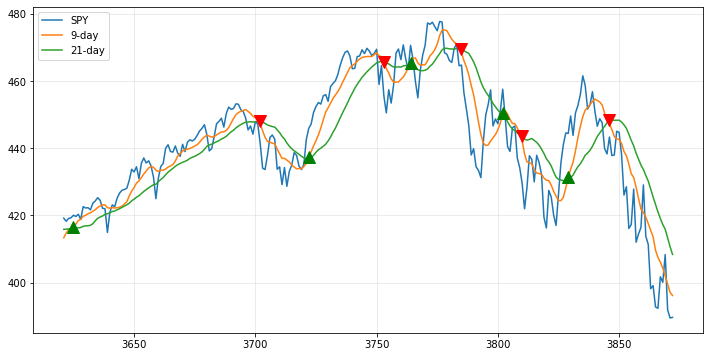

In [158]:
# Plot of the ETF with its 9-day and 21-day Moving average (Equity line)
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(SPY.iloc[-252:]['SPY'], label = 'SPY')
plt.plot(SPY.iloc[-252:]['9-day'], label = '9-day')
plt.plot(SPY.iloc[-252:]['21-day'], label = '21-day')
plt.plot(SPY[-252:].loc[SPY.entry == 2].index, SPY[-252:]['9-day'][SPY.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(SPY[-252:].loc[SPY.entry == -2].index, SPY[-252:]['21-day'][SPY.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

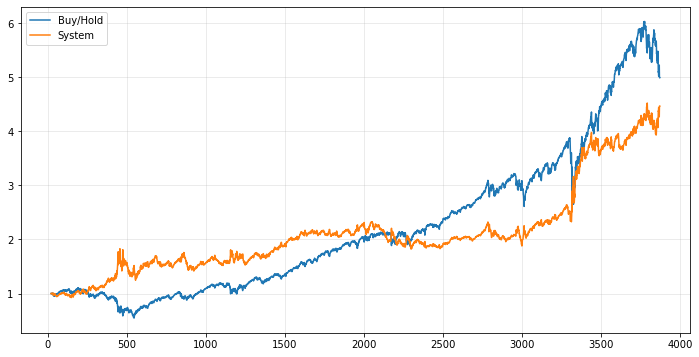

In [159]:
plt.plot(np.exp(SPY['SPY_rtns']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(SPY['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

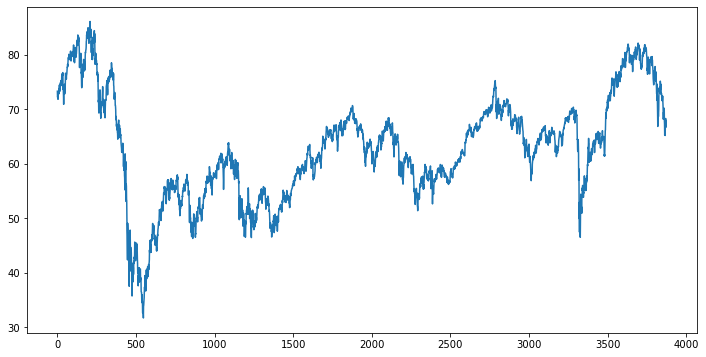

In [160]:
plt.plot(df['EFA_cls'])

# Annualized Returns

In [175]:
# (1 + Return) ^ (1 / 5 years) - 1
SPY['Annualized Returns'] = ((1+SPY['system_return']) ** 0.2 - 1)

SPY

/tmp/ipykernel_7923/1790191016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY['Annualized Returns'] = ((1+SPY['system_return']) ** 0.2 - 1)


,Date,SPY,SPY_rtns,Day,9-day,21-day,signal,system_return,entry,Annualized Returns
21,2/5/2007,144.850006,0.000276,22,143.466666,142.736191,1,0.000276,0.0,0.000055
22,2/6/2007,144.889999,0.000276,23,143.571111,142.943335,1,0.000276,0.0,0.000055
23,2/7/2007,145.210007,0.002209,24,143.898890,143.134763,1,0.002209,0.0,0.000441
24,2/8/2007,145.020004,-0.001308,25,144.220001,143.322859,1,-0.001308,0.0,-0.000262
25,2/9/2007,143.940002,-0.007447,26,144.430001,143.437145,1,-0.007447,0.0,-0.001494
...,...,...,...,...,...,...,...,...,...,...
3868,5/16/2022,400.089996,-0.004058,3869,404.263333,417.273334,-1,0.004058,0.0,0.000810
3869,5/17/2022,408.320007,0.020570,3870,401.958889,415.861430,-1,-0.020570,0.0,-0.004148
3870,5/18/2022,391.859985,-0.040312,3871,399.519999,413.329048,-1,0.040312,0.0,0.007935
3871,5/19/2022,389.459991,-0.006125,3872,397.088887,410.698095,-1,0.006125,0.0,0.001222


# Annualized Standard Deviation

In [180]:
# Annualized Standard Deviation = Standard Deviation of Daily Returns * Square Root (250)
SPY['Annualized_Std'] = SPY['system_return'].std()*math.sqrt(250)

SPY

/tmp/ipykernel_7923/748729878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY['Annualized_Std'] = SPY['system_return'].std()*math.sqrt(250)


,Date,SPY,SPY_rtns,Day,9-day,21-day,signal,system_return,entry,Annualized Returns,Annualized_Std
21,2/5/2007,144.850006,0.000276,22,143.466666,142.736191,1,0.000276,0.0,0.000055,0.202822
22,2/6/2007,144.889999,0.000276,23,143.571111,142.943335,1,0.000276,0.0,0.000055,0.202822
23,2/7/2007,145.210007,0.002209,24,143.898890,143.134763,1,0.002209,0.0,0.000441,0.202822
24,2/8/2007,145.020004,-0.001308,25,144.220001,143.322859,1,-0.001308,0.0,-0.000262,0.202822
25,2/9/2007,143.940002,-0.007447,26,144.430001,143.437145,1,-0.007447,0.0,-0.001494,0.202822
...,...,...,...,...,...,...,...,...,...,...,...
3868,5/16/2022,400.089996,-0.004058,3869,404.263333,417.273334,-1,0.004058,0.0,0.000810,0.202822
3869,5/17/2022,408.320007,0.020570,3870,401.958889,415.861430,-1,-0.020570,0.0,-0.004148,0.202822
3870,5/18/2022,391.859985,-0.040312,3871,399.519999,413.329048,-1,0.040312,0.0,0.007935,0.202822
3871,5/19/2022,389.459991,-0.006125,3872,397.088887,410.698095,-1,0.006125,0.0,0.001222,0.202822


# Sharpe Ratio

In [182]:
# Sharpe Ratio = (Expected portfolio returns – Risk free rate of return) / StdDev of portfolio return
SPY['Sharpe_Ratio'] = (SPY['Annualized Returns']-0)/SPY['Annualized_Std']

SPY

/tmp/ipykernel_7923/2155270395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY['Sharpe_Ratio'] = (SPY['Annualized Returns']-0)/SPY['Annualized_Std']


,Date,SPY,SPY_rtns,Day,9-day,21-day,signal,system_return,entry,Annualized Returns,Annualized_Std,Sharpe_Ratio
21,2/5/2007,144.850006,0.000276,22,143.466666,142.736191,1,0.000276,0.0,0.000055,0.202822,0.000272
22,2/6/2007,144.889999,0.000276,23,143.571111,142.943335,1,0.000276,0.0,0.000055,0.202822,0.000272
23,2/7/2007,145.210007,0.002209,24,143.898890,143.134763,1,0.002209,0.0,0.000441,0.202822,0.002176
24,2/8/2007,145.020004,-0.001308,25,144.220001,143.322859,1,-0.001308,0.0,-0.000262,0.202822,-0.001291
25,2/9/2007,143.940002,-0.007447,26,144.430001,143.437145,1,-0.007447,0.0,-0.001494,0.202822,-0.007366
...,...,...,...,...,...,...,...,...,...,...,...,...
3868,5/16/2022,400.089996,-0.004058,3869,404.263333,417.273334,-1,0.004058,0.0,0.000810,0.202822,0.003995
3869,5/17/2022,408.320007,0.020570,3870,401.958889,415.861430,-1,-0.020570,0.0,-0.004148,0.202822,-0.020453
3870,5/18/2022,391.859985,-0.040312,3871,399.519999,413.329048,-1,0.040312,0.0,0.007935,0.202822,0.039125
3871,5/19/2022,389.459991,-0.006125,3872,397.088887,410.698095,-1,0.006125,0.0,0.001222,0.202822,0.006025
